# Checkpoint_K-means & Hierarchical clustering _ by SERRAI Sihem Chourouk

# K-means & Hierarchical clustering 
## This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.
## Following is the Data Dictionary for Credit Card dataset :

* CUST_ID: Identification of Credit Cardholder (Categorical)
* BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
* PURCHASES: Amount of purchases made from the account.
* ONEOFF_PURCHASES: Maximum purchase amount done in one go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 
* CASHADVANCETRX: Number of Transactions made with "Cash in Advanced" PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user 
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

# Objective
## K-means & Hierarchical clustering 

1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use k-means clustering. 

5. Try different k values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: search for another validation metric

In [43]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Customer_Dataset 
* Step 1, Pre-processing and Data Vis

In [44]:
Customer_file = "CC GENERAL"
Customer_data = pd.read_csv("CC GENERAL.csv", sep=',')
Customer_data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [45]:
Customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [46]:
Customer_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


* Finding the Nan Values ... 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS'

In [47]:
Customer_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

* Filling the missing entries with the average of 'CREDIT_LIMIT', 'MINIMUM_PAYMENTS'

In [48]:
credit_limit = Customer_data['CREDIT_LIMIT']
credit_limit.fillna(credit_limit.median(), inplace=True)
min_payments = Customer_data['MINIMUM_PAYMENTS']
min_payments.fillna(min_payments.median(), inplace=True)

In [49]:
Customer_data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [50]:
Customer_data.shape

(8950, 18)

## 2. Hierarchical clustering to identify the inherent groupings for the customer data

In [51]:
# Extracting the useful features from the dataset  /  ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES 
X = Customer_data.iloc[:, [4, 5]].values

In [52]:
# K= 4 ... un K proposé aléatoirement 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## 3. Plot the clusters.

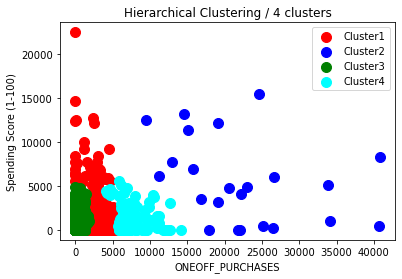

In [75]:
# Plotting the results without the dendrogram method
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.title('Hierarchical Clustering / 4 clusters')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 4. Ploting the dendrogram +  Using k-means clustering. 

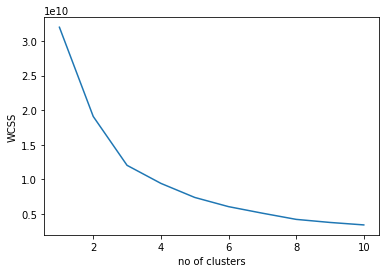

In [83]:
# Finding the optimal no.of Clusters by The Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

## 5. Trying different k values and selecting the best one. 

## K= 5

In [84]:
# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

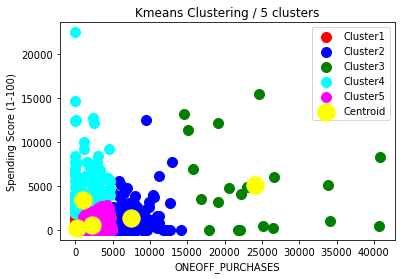

In [85]:
# Plotting the results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow', label = 'Centroid')
plt.title('Kmeans Clustering / 5 clusters')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K= 6

In [86]:
# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters = 6, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

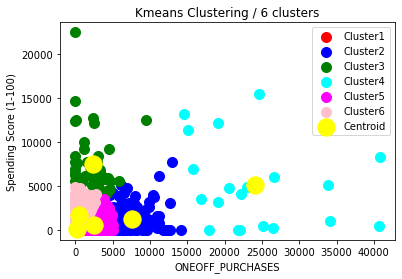

In [87]:
# Plotting the results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 100, c = 'pink', label = 'Cluster6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow', label = 'Centroid')
plt.title('Kmeans Clustering / 6 clusters')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K= 3

In [88]:
# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

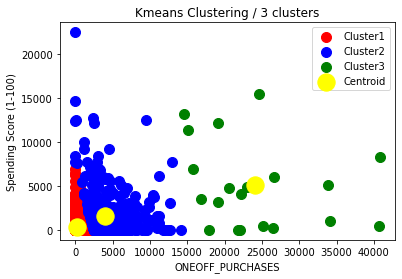

In [89]:
# Plotting the results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow', label = 'Centroid')
plt.title('Kmeans Clustering / 3 clusters')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K= 2

In [90]:
# Implementing the KMeans Algorithm with the optimal no.of Clusters
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

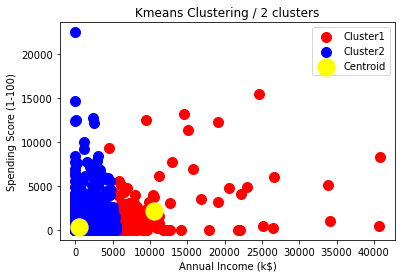

In [91]:
# Plotting the results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow', label = 'Centroid')
plt.title('Kmeans Clustering / 2 clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 7. Compare the  results. 

### The K = 5 seems to be the best one but it's not clear to compare with the other Ks
### We will trying to take other parameters to chech out the best K 

In [96]:
# Extracting the useful features from the dataset  
          
# ONEOFF_PURCHASES_FREQUENCY        
# PURCHASES_INSTALLMENTS_FREQUENCY
X2 = Customer_data.iloc[:, [8, 9]].values

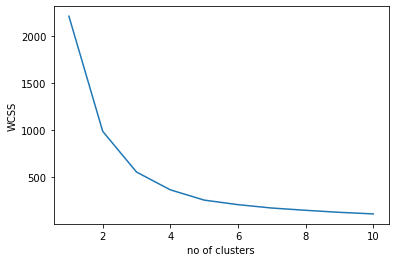

In [99]:
# Finding the optimal no.of Clusters by The Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

In [97]:
# k= 4
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X2)

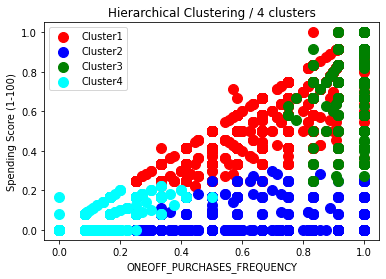

In [98]:
# Plotting the results without the dendrogram method
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster4')
plt.title('Hierarchical Clustering / 4 clusters')
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [101]:
# k = 2
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X2)

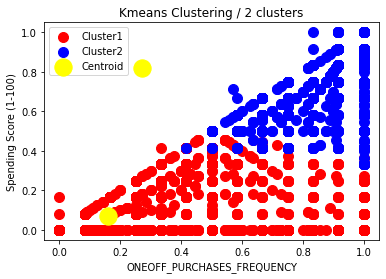

In [102]:
# Plotting the results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow', label = 'Centroid')
plt.title('Kmeans Clustering / 2 clusters')
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [104]:
# K= 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 0)
y_kmeans = kmeans.fit_predict(X2)

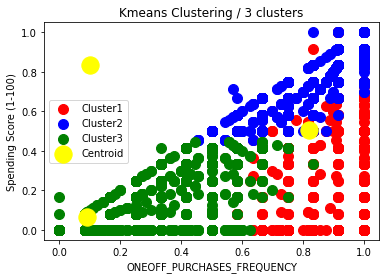

In [105]:
# Plotting the results
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'Yellow', label = 'Centroid')
plt.title('Kmeans Clustering / 3 clusters')
plt.xlabel('ONEOFF_PURCHASES_FREQUENCY')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()